# Lab 4 - Additional ODEs
We'll look into more ODEs that can be solved using our techniques. These are problems from Chapter 4 and some will likely be for homework. Use the lab time to begin working on them in this order:

1) Problem 4-5, multi-element radioactive decay. 

2) Problem 4-8, driven spring-mass system. Note the plot is amplitude vs drive frequency $\omega$

3) Problem 4-9, finite resources. Many models in finance, resource management, and economics follow a set of DEs. Use our tools to explore a model of oil based on extraction, price, and demand.

4) Problem 4-6 (if you have time).


In [4]:
from scipy.integrate import odeint
from numpy import *
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [92]:
#4-5

def decay(state , time):
    g0 = state[0]
    g1 = (-lamda_Sr)*state[0]
    g2 = (-lamda_Y)*state[1] -(-lamda_Sr)*state[0]
    return ([g0,g1,g2])

[]

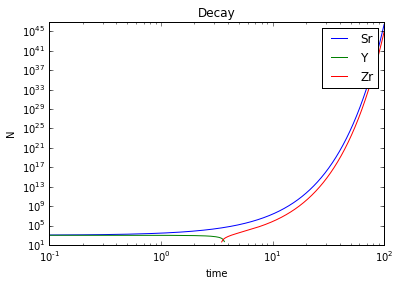

In [95]:
lamda_Sr = 0.024
lamda_Y = 0.26
N = 1000
y = array([1000,1000,0]) # initial y values
t = linspace(0,100,N)

answer = odeint(decay, y, t)

plt.plot(t,answer)
title('Decay')
xlabel ("time")
ylabel("N")

plt.legend(["Sr","Y","Zr"])

semilogy()
semilogx()

In [107]:
#4-8

def Spring_Force(time):
    g1 = A * cos(omega*time)
    return g1

def SpringMass(state,time):
    g0 = state[1]
    g1 = (-(k/m) * state[0] - g * f*sign(state[1]) + Spring_Force(time))/m
    return ([g0,g1])

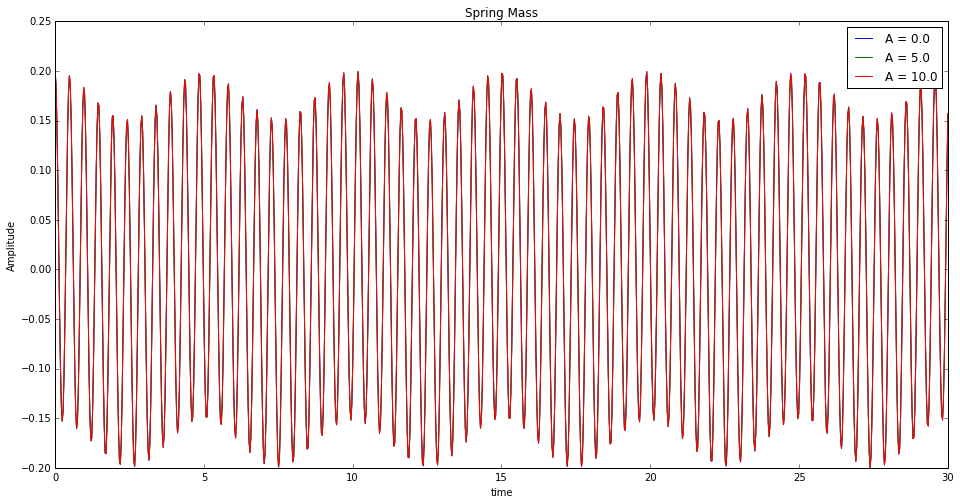

In [123]:
#a)
k = 42.0
m = 0.25
f = 0.15
g = 0
A = 1
S = 3
omega = .4*pi
N = 1000
y = array([0.2, 0]) # initial y values
t = linspace(0,30,N)

A_list = linspace(0,10,S)
figure(figsize(16,8))

for i in range(S):
    #A = A_list[i]
    answer = odeint(SpringMass, y, t)
    data = answer[:,0]
    plt.plot(t,data, label="A = {:.3}".format(A_list[i]))
title('Spring Mass')
xlabel ("time")
ylabel("Amplitude")
legend()
#b)


In [112]:
print(answer[0])

[ 0.2  0. ]


In [22]:
#4-9

def D(state, time):
    return state[0]

def W(state, time):
    W = 1/(1-E(state, time))
    return W

def E(state, time):
    return state[1]

def R(state,time):
    R = D(state,time)/W(state,time)
    return R

def C(state, time):
    C = (D(state, time)/R(state, time))*epsilon
    return C

def derivs(state,time):
    return ([alpha * E(state,time), D(state,time)/W(state,time)])
    

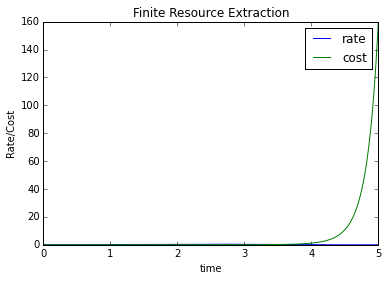

In [43]:
N = 1000
Do = 0.1
alpha = 2.0
epsilon = 0.01
y = array([Do,0])

t = linspace(0,5,N)


answer = odeint(derivs, y, t)
Rval = [R(answer[i],0) for i in range(N)]
Cval = [C(answer[i],0) for i in range(N)]

plt.plot(t,Rval)
plt.plot(t,Cval)
title('Finite Resource Extraction')
xlabel ("time")
ylabel("Rate/Cost")
plt.legend(["rate","cost"])

In [37]:

[R(answer[i],0) for i in range(N)]

[0.10000000000000001,
 0.09995246474320045,
 0.099909952316136086,
 0.09987245072192788,
 0.099839947614042565,
 0.099812433460308672,
 0.099789896026998892,
 0.099772323192525214,
 0.099759702838497791,
 0.099752024381596804,
 0.09974927938941007,
 0.099751457488390802,
 0.099758548255385771,
 0.099770541422864692,
 0.099787428802773803,
 0.099809201535310269,
 0.099835850272836396,
 0.099867365655451623,
 0.099903741135186575,
 0.099944964807964887,
 0.099991032373080616,
 0.10004193498127679,
 0.10009766416292509,
 0.10015821345632533,
 0.10022357588998157,
 0.10029374436144486,
 0.10036871206178355,
 0.10044847247359324,
 0.10053301936900777,
 0.10062234680771047,
 0.10071644913494555,
 0.10081532097952953,
 0.10091895664547754,
 0.10102735033230868,
 0.1011404970634467,
 0.10125839209906666,
 0.10138103093285206,
 0.10150840929008101,
 0.10164052312570998,
 0.10177736862245486,
 0.10191894218886886,
 0.10206524025645355,
 0.10221625849121385,
 0.10237199338741972,
 0.1025324417421